## Problem: For a given set of x,y create a program to calculate the next number for a given y.

In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [49]:
def compute_slope(x1, y1, x2, y2): #y = mx + c (Slope = m)
    return (y2 - y1) / (x2 - x1)

In [50]:
def get_line_formula(x1, y1, x2, y2): #y = mx + c (Intercept = c)
    slope = compute_slope(x1, y1, x2, y2)
    intercept = y1 - slope * x1
    return slope, intercept

In [51]:
def point_line_distance(m, c, x, y): # Perpendicular distance of a point from the line
    return abs(m * x - y + c) / math.sqrt(m**2 + 1)

In [52]:
def average_distance(points, m, c): # Average distance of all points from the line
    return sum(point_line_distance(m, c, x, y) for x, y in points) / len(points)

In [53]:
def point_pairs(data): # All unique point pairs (for line generation)
    return [(data[i], data[j]) for i in range(len(data)) for j in range(i + 1, len(data))]

In [54]:
def best_fit_line(points): # Find the best line that fits most points based on least mean distance
    optimal_line = None
    min_avg_dist = float('inf')
    best_pair = None

    for (x1, y1), (x2, y2) in point_pairs(points):
        slope, intercept = get_line_formula(x1, y1, x2, y2)
        rest = [(x, y) for (x, y) in points if (x, y) != (x1, y1) and (x, y) != (x2, y2)]
        avg_dist = average_distance(rest, slope, intercept)

        if avg_dist < min_avg_dist:
            min_avg_dist = avg_dist
            optimal_line = (slope, intercept)
            best_pair = [(x1, y1), (x2, y2)]

    return optimal_line, min_avg_dist, best_pair

In [55]:
def estimate_x(line, y): #Estimate x for a given y
    slope, intercept = line
    return (y - intercept) / slope

In [56]:
def draw_graph(line, chosen_points, estimated, actual):
    slope, intercept = line
    x_vals = np.linspace(0, 50, 400)
    y_vals = slope * x_vals + intercept

    plt.figure(figsize=(12, 10))
    plt.plot(x_vals, y_vals, label='Best Fit Line')
    plt.scatter(x_series, y_series, color='blue', label='All Data Points')
    
    plt.scatter(*estimated, color='green', label='Predicted X')
    plt.scatter(*actual, color='red', label='Actual X')
    plt.scatter(chosen_points[0][0], chosen_points[0][1], color='yellow')
    plt.scatter(chosen_points[1][0], chosen_points[1][1], color='yellow')

    plt.legend()
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Best Fit Line and Prediction")
    plt.show()

Predicted x for y = 261.356844442644 is 48.05 , Actual x = 48
Predicted x for y = 263.64832178970084 is 48.50 , Actual x = 49


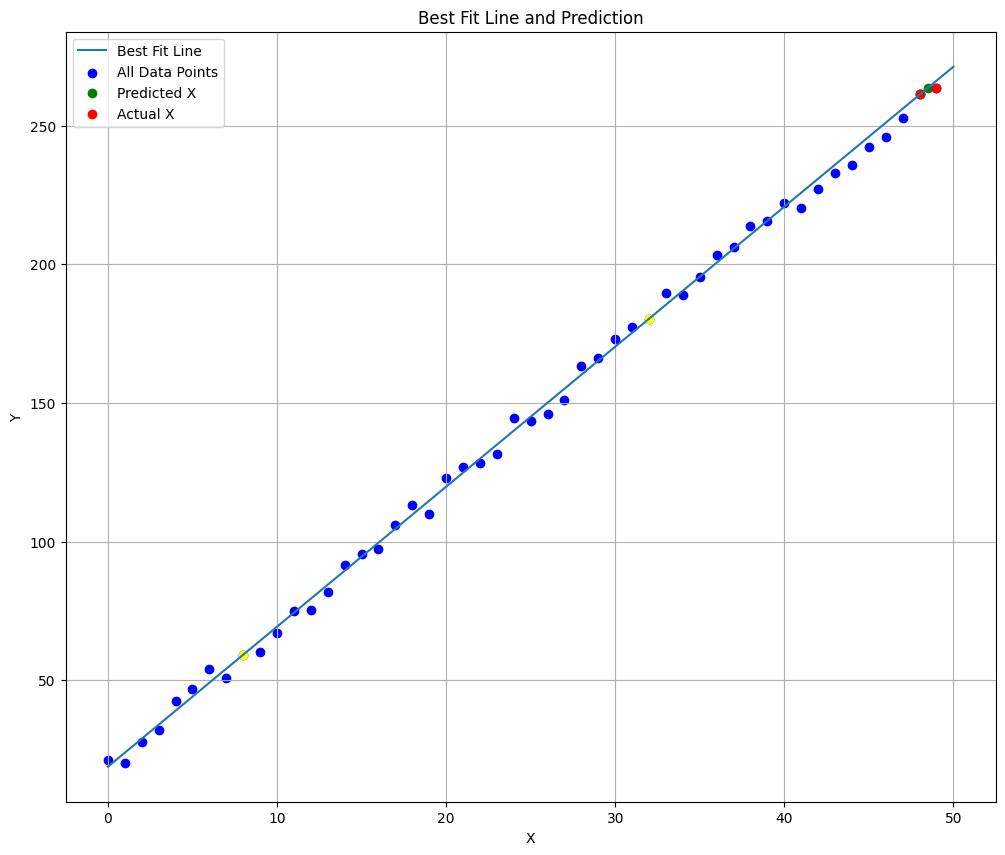

In [57]:
random.seed(42)
x_series = []
y_series = []

for x in range(50):
    noise = 10 * random.random()
    y = 5 * x + 15 + noise
    x_series.append(x)
    y_series.append(y)

dataset = list(zip(x_series, y_series))
training_data = dataset[:-2]
test_y_values = [dataset[-2][1], dataset[-1][1]]
true_x_values = [dataset[-2][0], dataset[-1][0]]

line, _, best_pts = best_fit_line(training_data)

predicted_xs = [estimate_x(line, y) for y in test_y_values]

# Print predictions
for i in range(2):
    print(f"Predicted x for y = {test_y_values[i]} is {predicted_xs[i]:.2f} , Actual x = {true_x_values[i]}")

draw_graph(line, best_pts, ([predicted_xs[0], predicted_xs[1]], test_y_values), ([true_x_values[0], true_x_values[1]], test_y_values))